
# Cost of Living Index Analysis

## Introduction

The Cost of Living Index is a critical metric that reflects the relative expense of living in various countries. It encompasses a wide range of factors, including the price of groceries, housing, transportation, and other essential goods and services. Understanding the Cost of Living Index is crucial for individuals, businesses, and policymakers as it helps inform decisions related to relocation, investment, and wage adjustments.

In this analysis, we will explore the Cost of Living Index across different countries and regions for the year 2024. By comparing the cost of living across various countries, we aim to gain insights into which regions are the most and least expensive to live in, and how different indices such as the Rent Index and Grocery Index correlate with the overall cost of living.

## Project Objectives

The primary objectives of this project are:

1. **Identify the countries with the highest and lowest Cost of Living Index.**
2. **Analyze the relationship between the Rent Index and the Cost of Living Index.**
3. **Examine how the Cost of Living Index varies across different regions.**
4. **Investigate other factors (e.g., Grocery Index) that may influence the Cost of Living Index.**

Through this analysis, we aim to provide a comprehensive overview of global cost of living patterns, offering valuable insights for anyone interested in economic geography, international business, or personal finance.



## Data Description

The dataset used in this analysis is titled **"Cost of Living Index by Country 2024"**. This dataset contains information about the relative cost of living across various countries. The data is structured with the following columns:

- **Country**: The name of the country.
- **Cost_of_Living_Index**: A composite index that reflects the overall cost of living in the country, relative to a base country (typically the United States).
- **Rent_Index**: An index that reflects the cost of renting in the country, relative to the base country.
- **Groceries_Index**: An index reflecting the cost of groceries in the country.
- **Restaurant_Price_Index**: An index that reflects the cost of dining out in restaurants.
- **Local_Purchasing_Power_Index**: An index that reflects the relative purchasing power of residents in the country, considering the local cost of living.

### Data Source

The data was sourced from [NUMBEO](https://www.numbeo.com/cost-of-living/), which aggregates and analyzes user-contributed data on the cost of living, housing indicators, health care, traffic, crime, and pollution in various cities and countries worldwide.

### Data Preprocessing

Before beginning the analysis, the following preprocessing steps were performed:

1. **Handling Missing Values**: The dataset was checked for missing values. Any missing values in key columns such as `Cost_of_Living_Index` and `Country` were addressed.
2. **Outlier Detection**: Outliers in the indices were identified and handled to prevent skewed results.
3. **Data Type Conversion**: Ensured that all numerical columns were correctly formatted as numeric data types, and the `Country` column was set as a categorical variable for better visualization.
4. **Consistency Checks**: Checked for inconsistencies in country names (e.g., duplicate entries or different names for the same country) and corrected them.

These preprocessing steps were essential to ensure the reliability and accuracy of the analysis.



## Code Explanation

The code performs the following tasks:

- **Import Libraries**: Import necessary libraries such as pandas, numpy, matplotlib, and seaborn.
- **Load Data**: Load the dataset from a CSV file.
- **Display Data**: Display the first few rows and summary statistics of the dataset.
- **Check Missing Values**: Check for any missing values in the dataset.
- **Preprocess Data**: Rename columns to remove spaces, handle missing values, and convert relevant columns to numeric types.
- **Correlation Analysis**: Calculate and visualize correlations between numerical columns.
- **Distribution Analysis**: Plot the distribution of various indices.
- **Top 10 Analysis**: Identify and visualize the top 10 countries by Cost of Living Index.
- **Comparison Analysis**: Compare indices between specific countries (e.g., Switzerland and the United States).
- **Clustering**: Apply K-Means clustering and visualize the clusters.
- **Hierarchical Clustering**: Perform hierarchical clustering and visualize the dendrogram.

In [2]:
import pandas as pd  # Importing pandas for data manipulation and analysis
import numpy as np   # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import seaborn as sns  # Importing seaborn for statistical data visualization

url = 'https://raw.githubusercontent.com/aminooo101/Cost-of-living-Analysis/main/Data/Cost_of_Living_Index_by_Country_2024.csv'

# Load the data from a CSV file
df = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataset to get an overview
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [4]:
# Check the summary statistics of the dataset
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [5]:
# Check for any missing values in the dataset
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [6]:
# Example: Renaming columns to remove spaces
df.columns = df.columns.str.replace(' ', '_')


In [7]:
# Handling missing values (if any)
df.dropna(inplace=True)
df.dropna(axis=1, inplace=True)


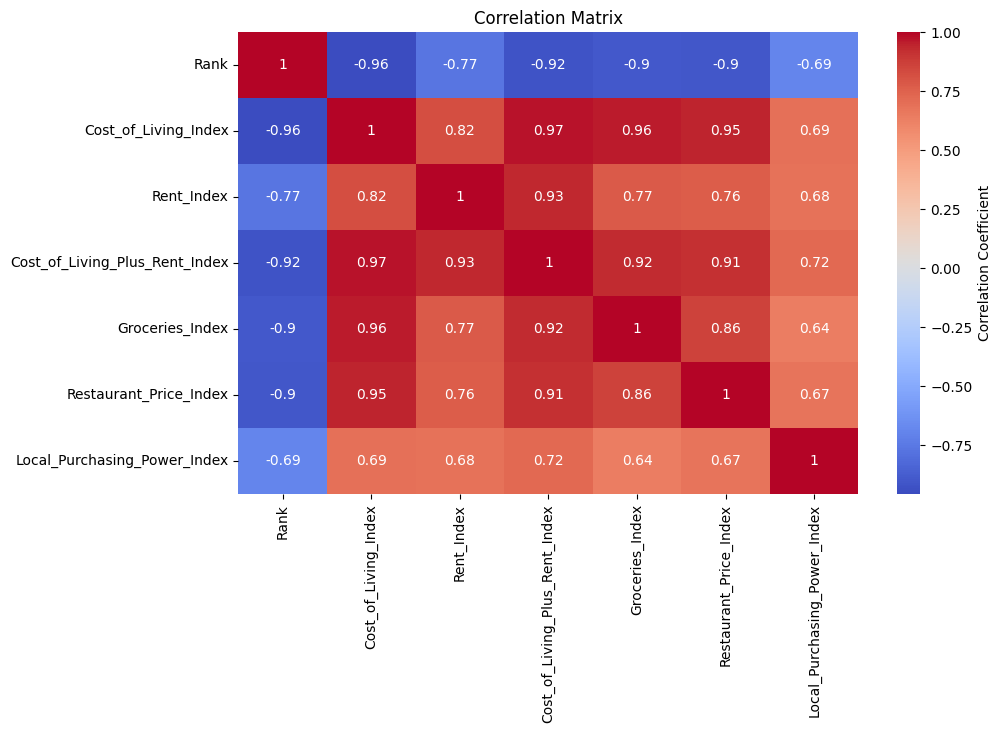

In [8]:
# Calculate correlations only for numerical columns and visualize them using a heatmap
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')

# Create a colorbar as a legend
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Correlation Coefficient')

# Set the title for the heatmap
plt.title('Correlation Matrix')
plt.show()

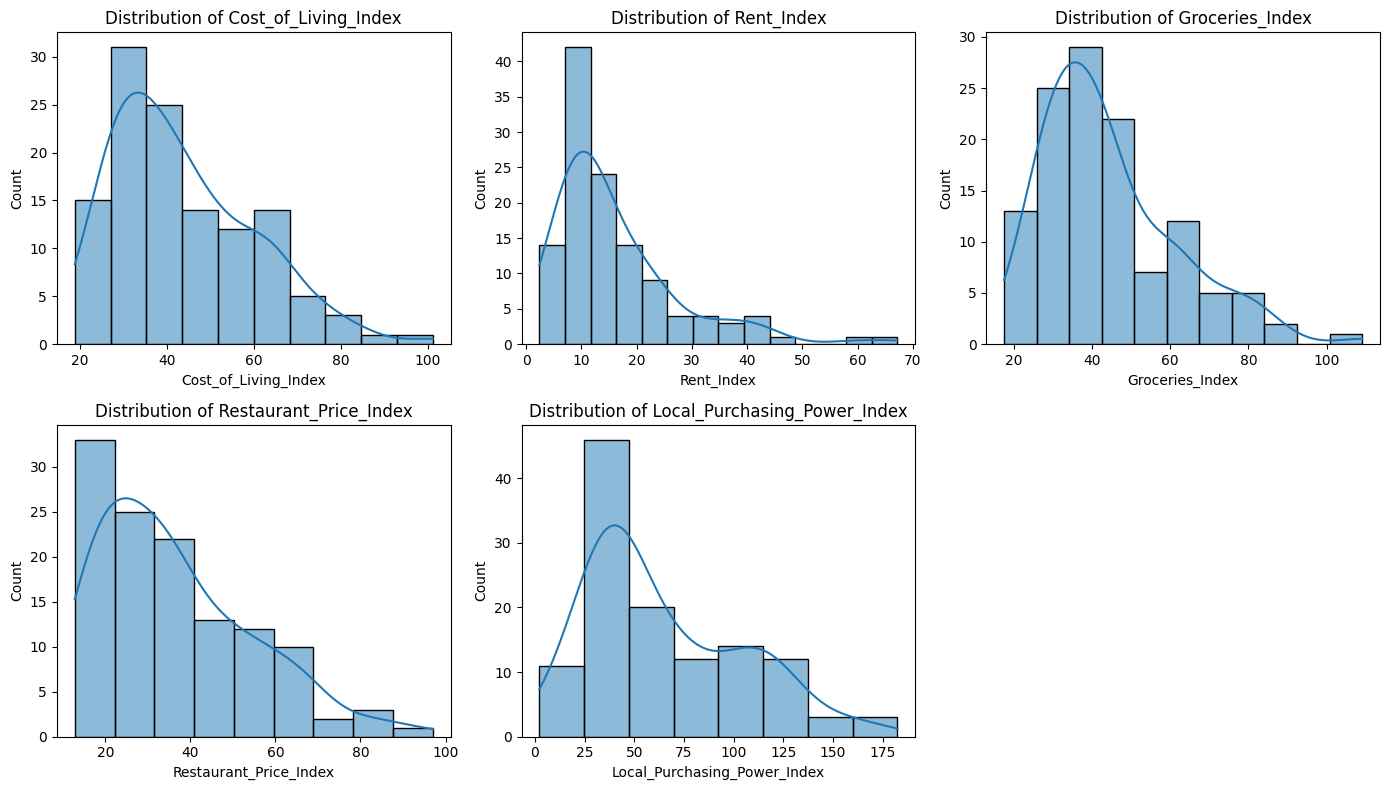

In [9]:
# Plot the distribution of various indices
indices = ['Cost_of_Living_Index', 'Rent_Index', 'Groceries_Index', 'Restaurant_Price_Index', 'Local_Purchasing_Power_Index']

plt.figure(figsize=(14, 8))
for i, index in enumerate(indices):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[index], kde=True)
    plt.title(f'Distribution of {index}')
plt.tight_layout()
plt.show()


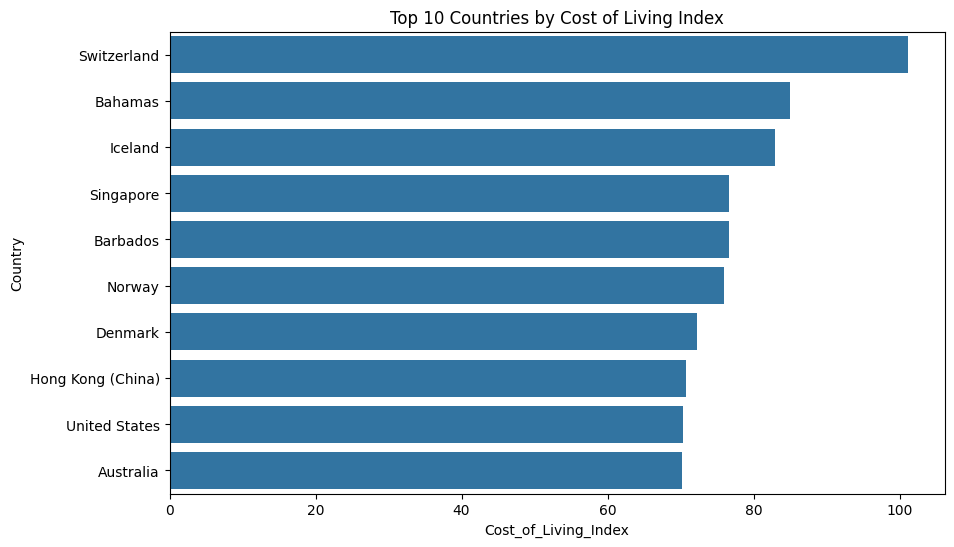

In [10]:
# Identify and visualize the top 10 countries by Cost of Living Index
top_10 = df.nlargest(10, 'Cost_of_Living_Index')

plt.figure(figsize=(10, 6))
sns.barplot(x='Cost_of_Living_Index', y='Country', data=top_10)
plt.title('Top 10 Countries by Cost of Living Index')
plt.show()


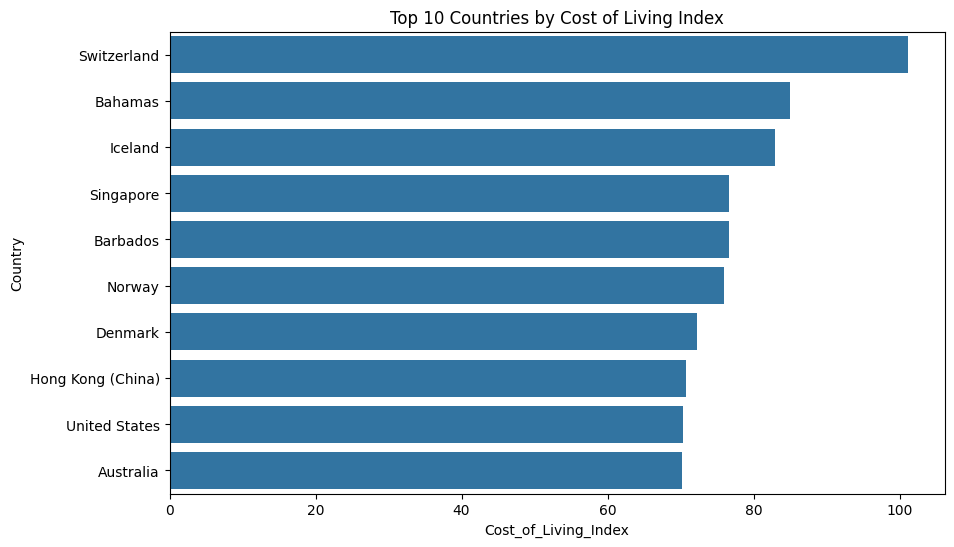

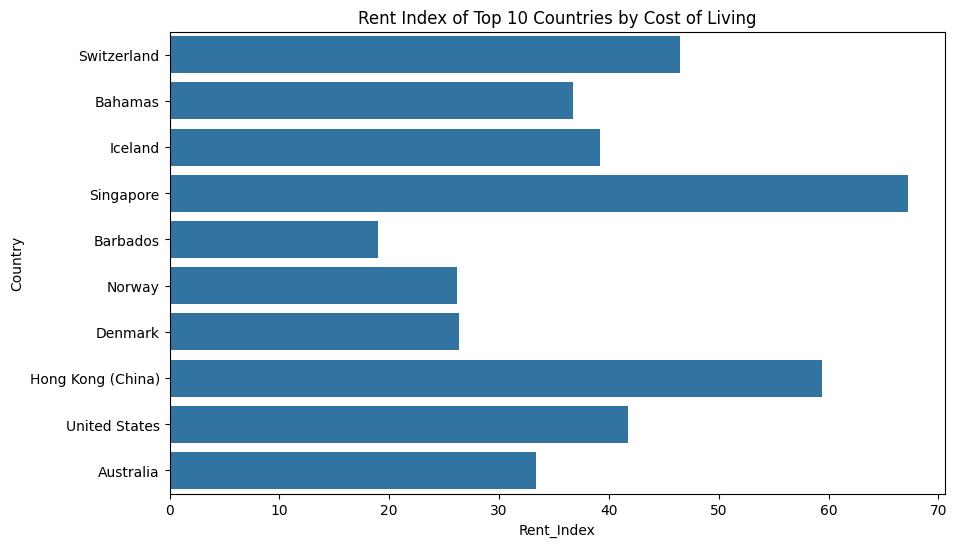

In [11]:
# Plotting Cost of Living Index across top 10 countries
top_10_col = df.nlargest(10, 'Cost_of_Living_Index')
plt.figure(figsize=(10, 6))
sns.barplot(x='Cost_of_Living_Index', y='Country', data=top_10_col)
plt.title('Top 10 Countries by Cost of Living Index')
plt.show()

# Comparing Rent Index across top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Rent_Index', y='Country', data=top_10_col)
plt.title('Rent Index of Top 10 Countries by Cost of Living')
plt.show()


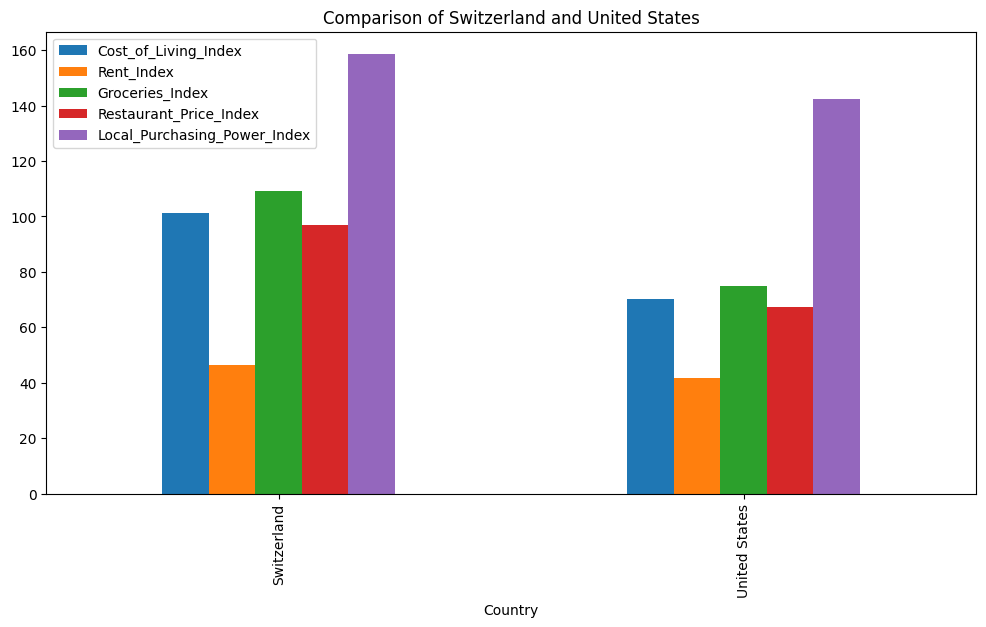

In [12]:
# Compare indices between specific countries (e.g., Switzerland and the United States)
countries_to_compare = df[df['Country'].isin(['Switzerland', 'United States'])]
indices = ['Cost_of_Living_Index', 'Rent_Index', 'Groceries_Index', 'Restaurant_Price_Index', 'Local_Purchasing_Power_Index']

countries_to_compare.plot(x='Country', y=indices, kind='bar', figsize=(12, 6), title='Comparison of Switzerland and United States')
plt.show()



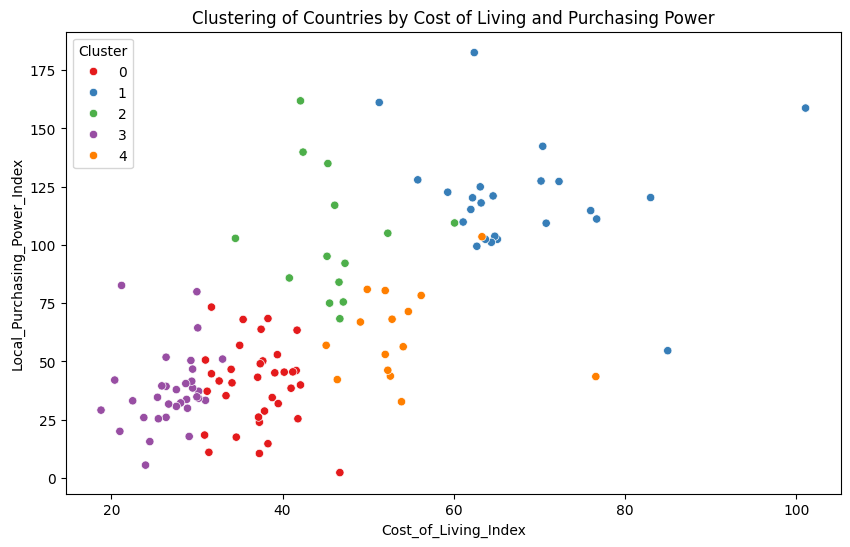

In [13]:
# Apply K-Means clustering and visualize the clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = df[['Cost_of_Living_Index', 'Rent_Index', 'Groceries_Index', 'Restaurant_Price_Index', 'Local_Purchasing_Power_Index']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost_of_Living_Index', y='Local_Purchasing_Power_Index', hue='Cluster', data=df, palette='Set1')
plt.title('Clustering of Countries by Cost of Living and Purchasing Power')
plt.show()

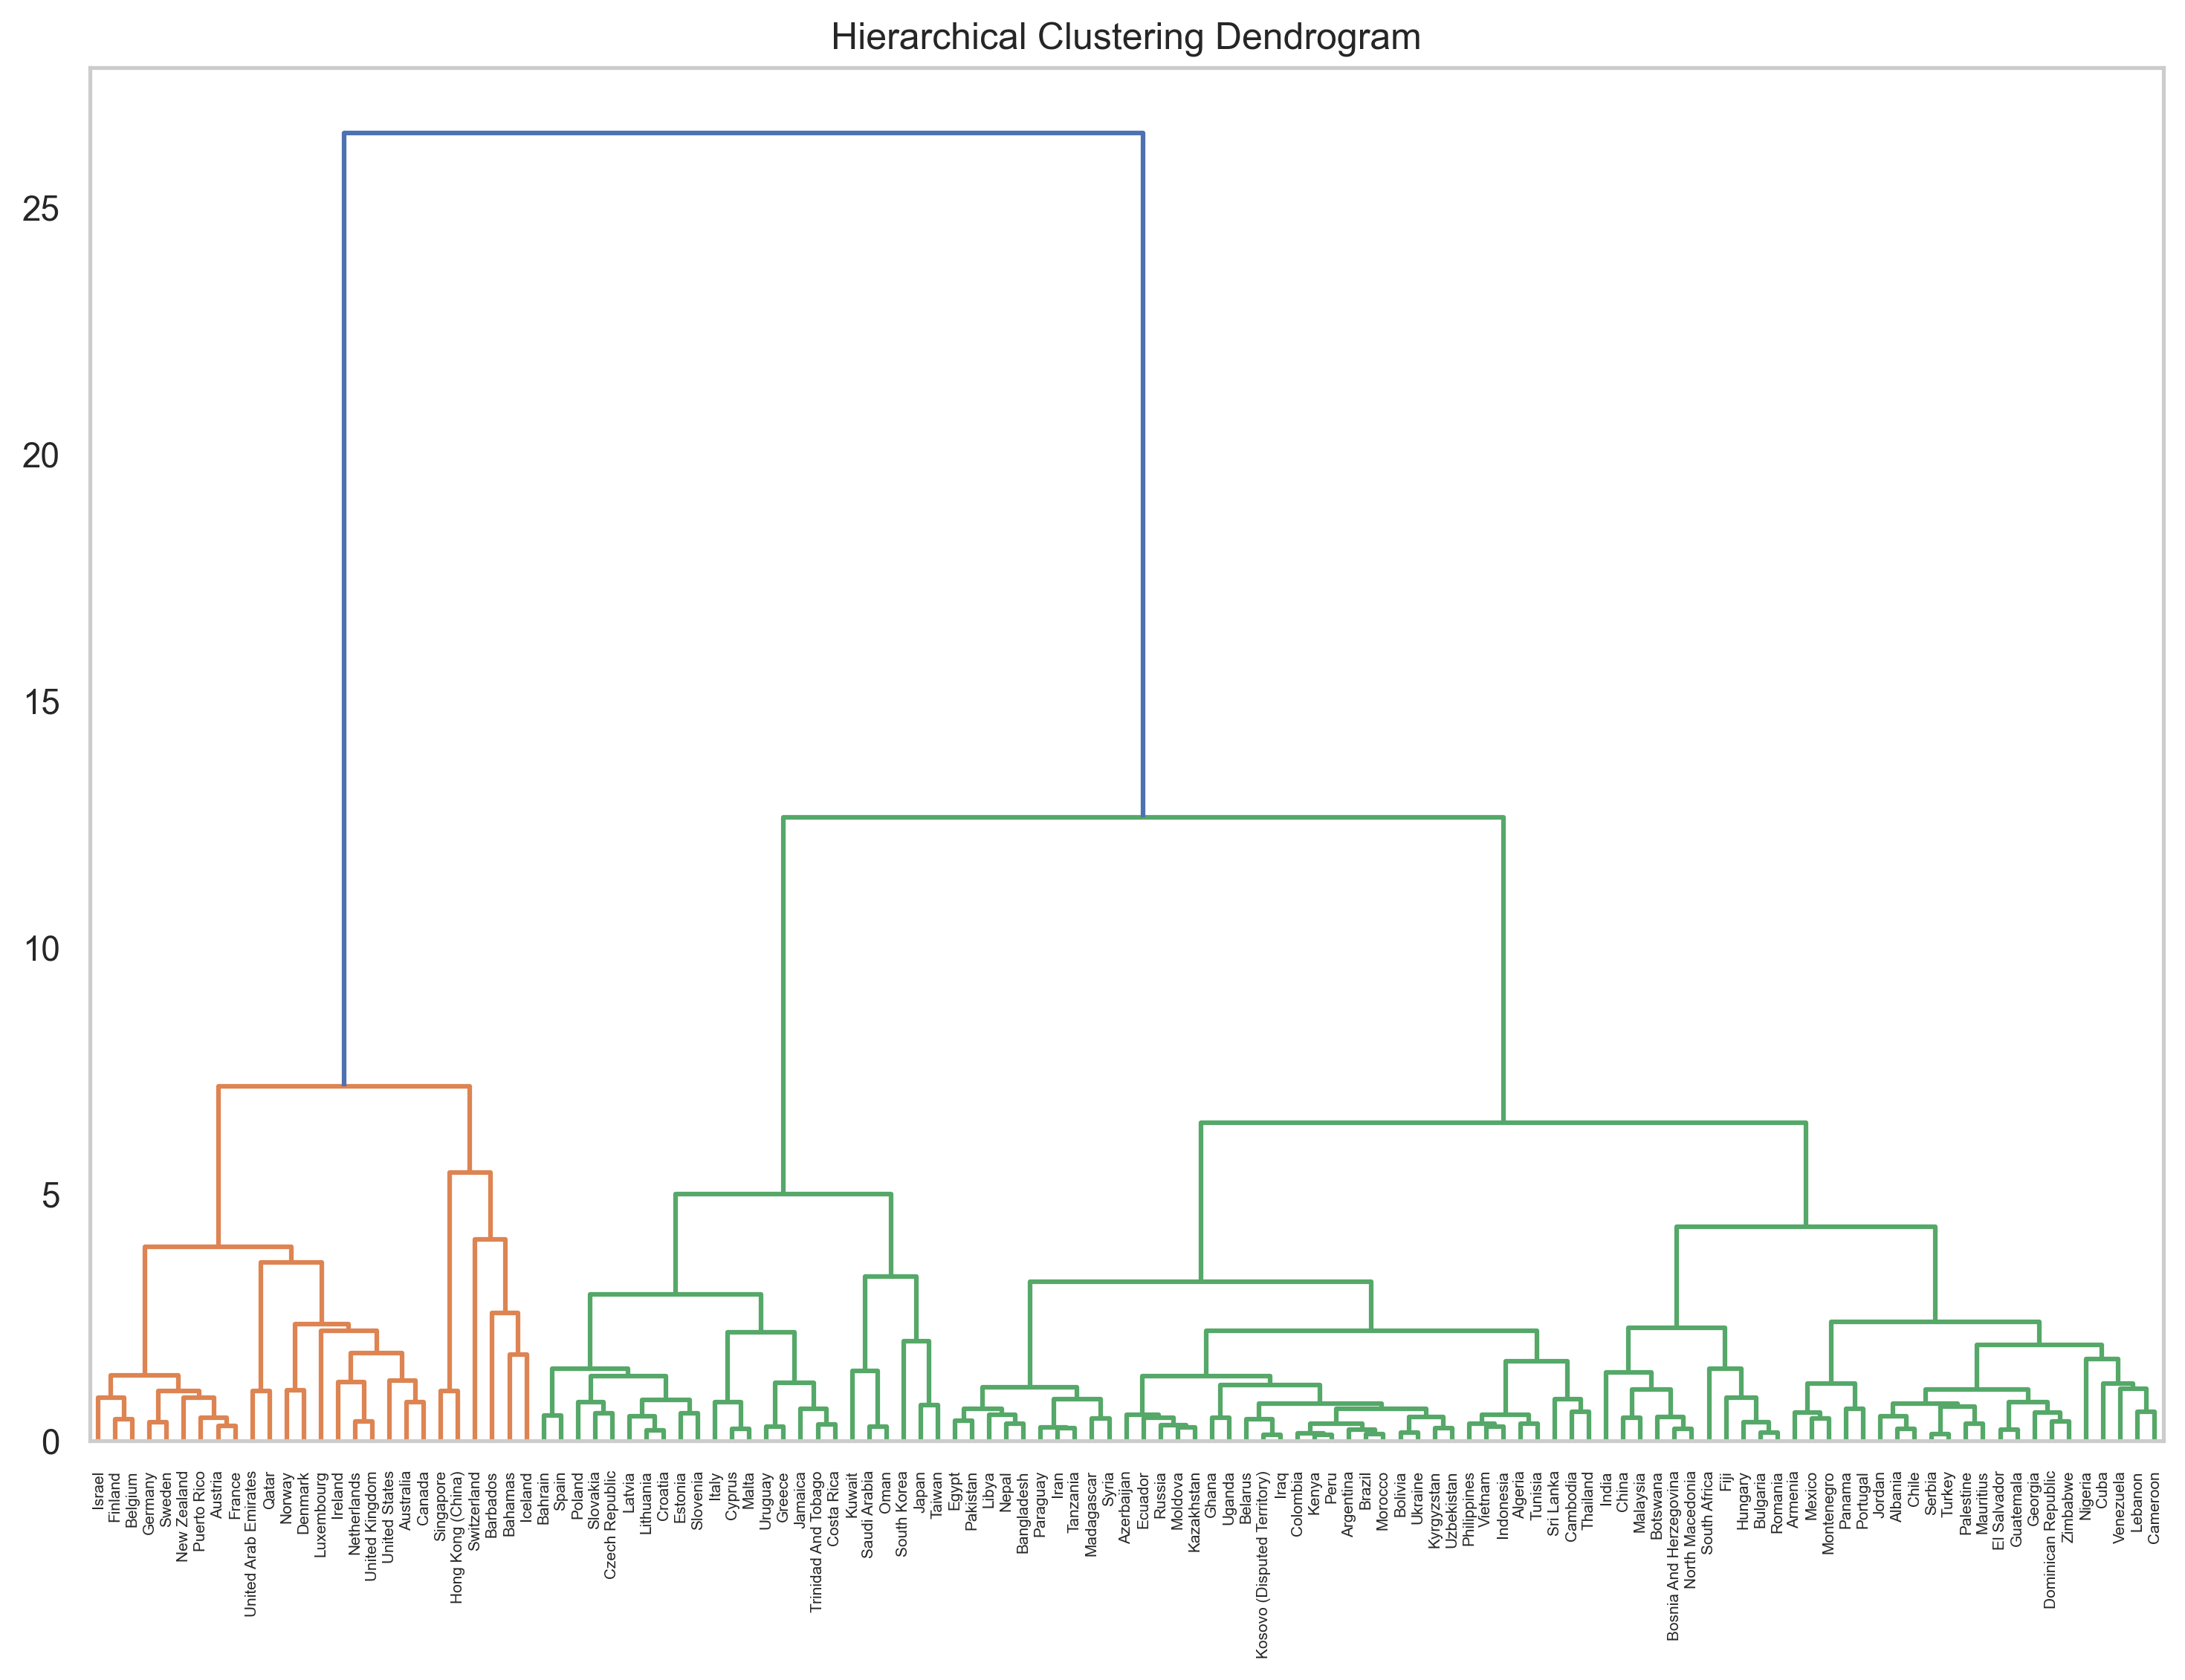

In [14]:
# Perform hierarchical clustering and visualize the dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Hierarchical clustering
linked = linkage(scaled_features, 'ward')

# Set aesthetics
sns.set(style='whitegrid')

# Plot the dendrogram
plt.figure(figsize=(12, 8),dpi=300)
dendrogram(linked, labels=df['Country'].values, orientation='top', color_threshold=0.7*max(linked[:,2]), leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.grid(False)
plt.show()


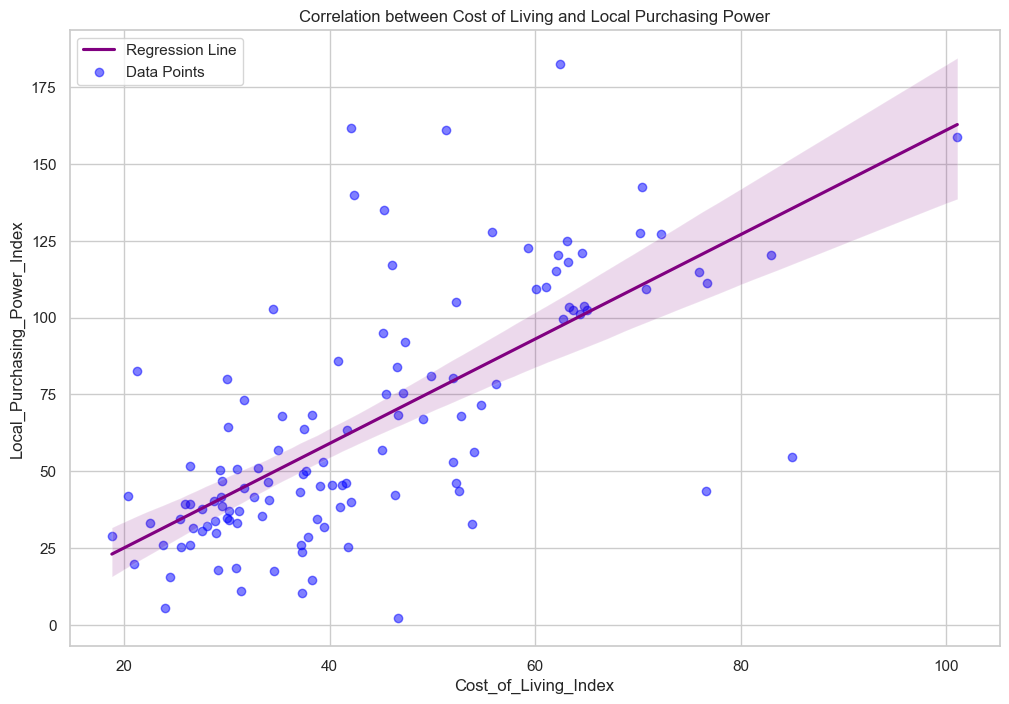

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create scatter plot explicitly
scatter_handle = plt.scatter(df['Cost_of_Living_Index'],
                             df['Local_Purchasing_Power_Index'],
                             color='blue', alpha=0.5,
                             label='Data Points')

# Plot regression line
ax = sns.regplot(x='Cost_of_Living_Index',
                 y='Local_Purchasing_Power_Index',
                 data=df,
                 color='purple',
                 scatter=False,
                 label='Regression Line')

# Extract line objects
line, = ax.get_lines()

# Create legend with both scatter and line handles
plt.legend(handles=[line, scatter_handle],loc='upper left')

plt.title('Correlation between Cost of Living and Local Purchasing Power')
plt.show()

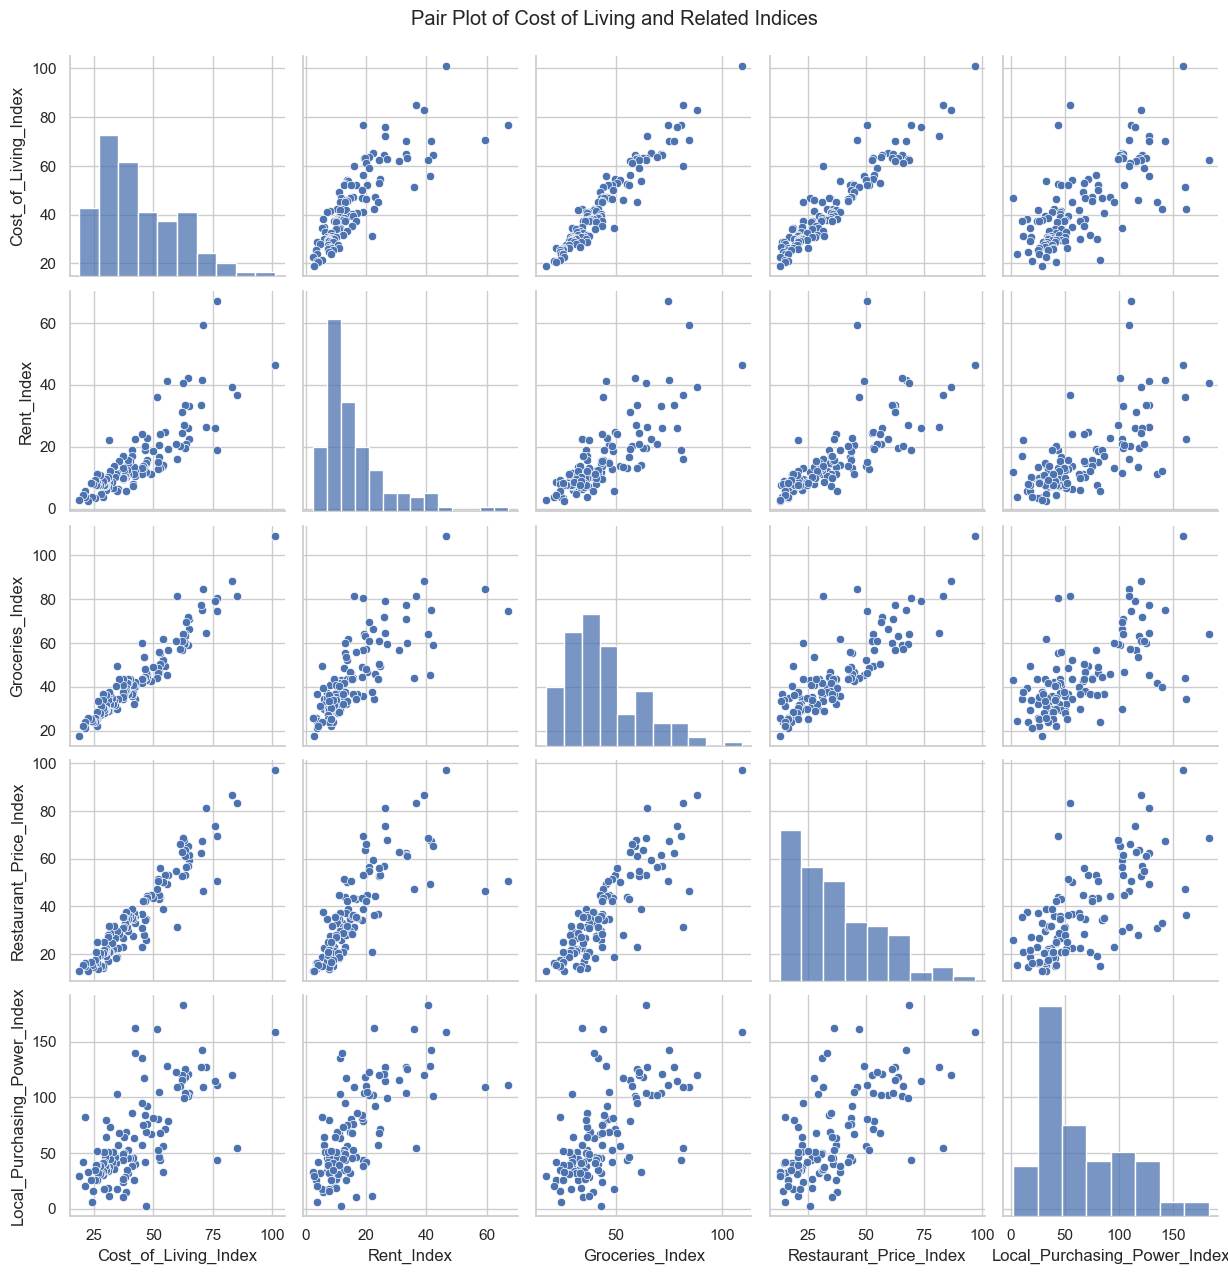

In [16]:
# Create a pair plot to visualize the relationships between different indices
sns.pairplot(df[['Cost_of_Living_Index', 'Rent_Index', 'Groceries_Index', 'Restaurant_Price_Index', 'Local_Purchasing_Power_Index']])

# Set the title for the pair plot
plt.suptitle('Pair Plot of Cost of Living and Related Indices', y=1.02)

# Display the plot
plt.show()


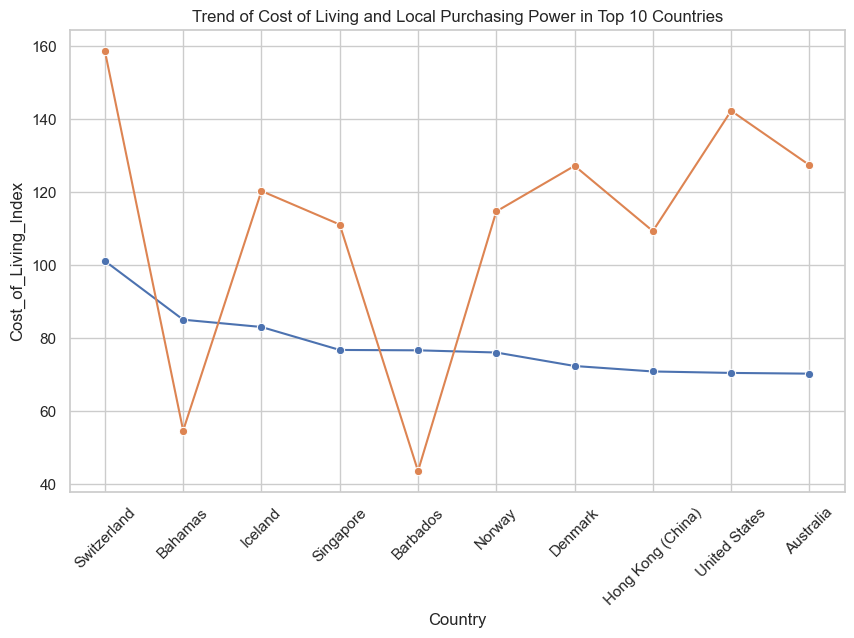

In [17]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Select the top 10 countries with the highest Cost of Living Index
top_10 = df.nlargest(10, 'Cost_of_Living_Index')

# Plot the Cost of Living Index for the top 10 countries using a line plot
sns.lineplot(x='Country', y='Cost_of_Living_Index', data=top_10, marker='o')

# Plot the Local Purchasing Power Index for the top 10 countries using a line plot
sns.lineplot(x='Country', y='Local_Purchasing_Power_Index', data=top_10, marker='o')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set the title for the plot
plt.title('Trend of Cost of Living and Local Purchasing Power in Top 10 Countries')

# Display the plot
plt.show()

In [18]:
import plotly.express as px  # Importing Plotly Express for interactive visualizations

# Create a choropleth map to visualize the Cost of Living Index by country
fig = px.choropleth(
    df,
    locations='Country',  # Column containing country names
    locationmode='country names',  # Mode to interpret the locations
    color='Cost_of_Living_Index',  # Column to determine the color of the countries
    hover_name='Country',  # Column to display when hovering over a country
    color_continuous_scale='Viridis',  # Color scale for the map
    **{'title': 'Cost of Living Index by Country'}  # Title of the map
)

# Customize the layout of the colorbar
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Cost of Living Index",  # Title of the colorbar
        thicknessmode="pixels",  # Thickness mode of the colorbar
        thickness=20,  # Thickness of the colorbar in pixels
        lenmode="pixels",  # Length mode of the colorbar
        len=300,  # Length of the colorbar in pixels
        xanchor="right",  # Anchor the colorbar to the right
        yanchor="top",  # Anchor the colorbar to the top
        x=1,  # X position of the colorbar
        y=1  # Y position of the colorbar
    ),

    # Customize the hover label
    hoverlabel=dict(
        bgcolor="white",  # Background color of the hover label
        font_size=18,  # Font size of the hover label
        font_family="Rockwell"  # Font family of the hover label
    )
)

# Remove margins from the layout
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Display the choropleth map
fig.show()

## Which countries have the highest and lowest Cost of Living Index?

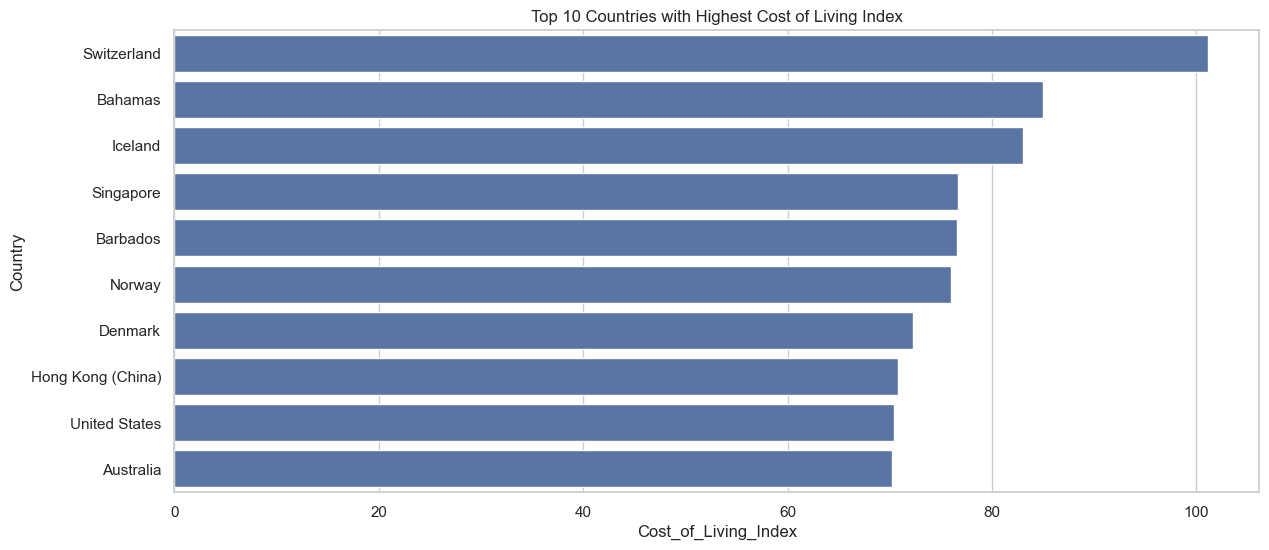

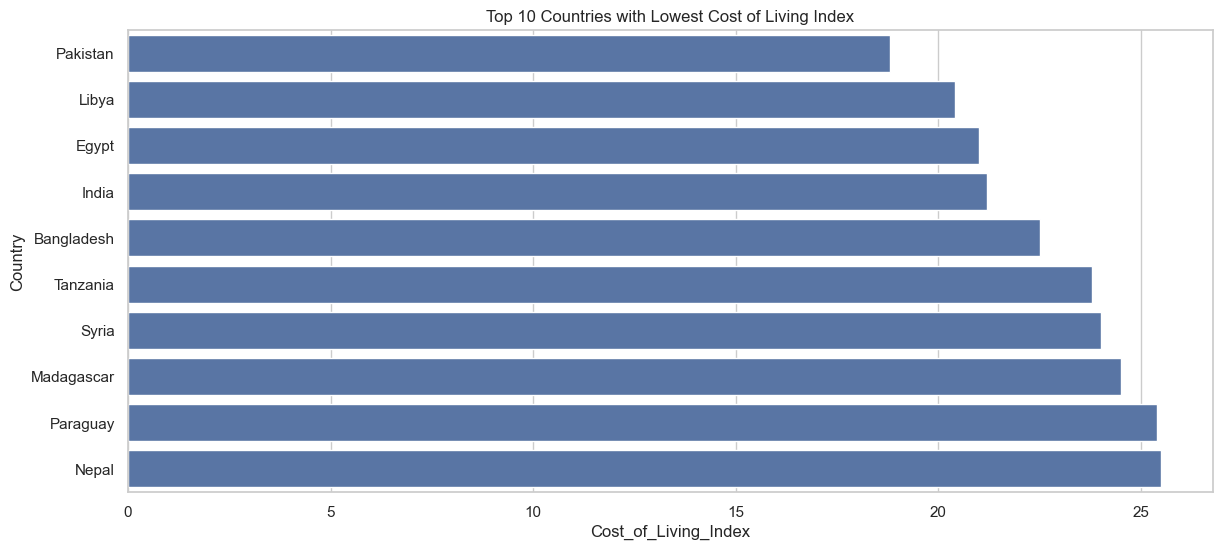

In [19]:
# Top 10 countries with the highest and lowest Cost of Living Index
top_10 = df.nlargest(10, 'Cost_of_Living_Index')  # Select the top 10 countries with the highest Cost of Living Index
bottom_10 = df.nsmallest(10, 'Cost_of_Living_Index')  # Select the bottom 10 countries with the lowest Cost of Living Index

# Plot the top 10 countries with the highest Cost of Living Index
plt.figure(figsize=(14, 6))  # Set the figure size
sns.barplot(x='Cost_of_Living_Index', y='Country', data=top_10)  # Create a bar plot for the top 10 countries
plt.title('Top 10 Countries with Highest Cost of Living Index')  # Set the title of the plot
plt.show()  # Display the plot

# Plot the bottom 10 countries with the lowest Cost of Living Index
plt.figure(figsize=(14, 6))  # Set the figure size
sns.barplot(x='Cost_of_Living_Index', y='Country', data=bottom_10)  # Create a bar plot for the bottom 10 countries
plt.title('Top 10 Countries with Lowest Cost of Living Index')  # Set the title of the plot
plt.show()  # Display the plot

##What is the relationship between Rent Index and Cost of Living Index?

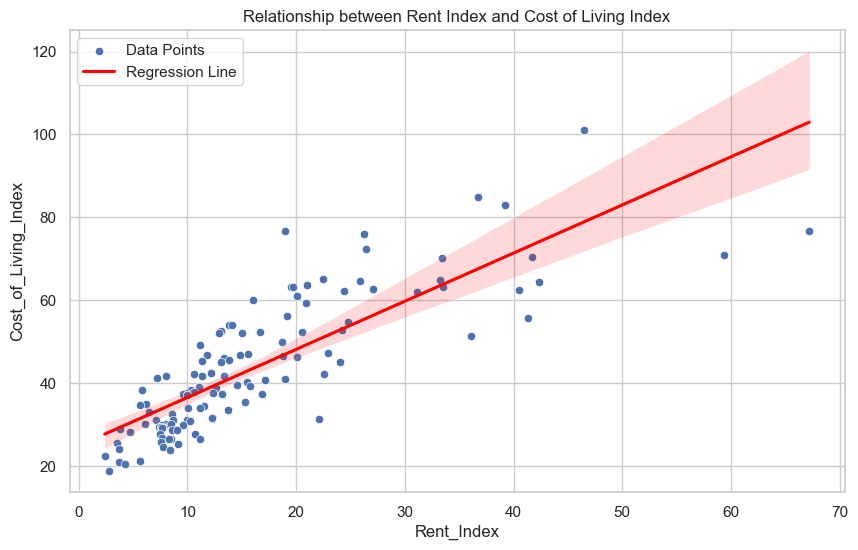

In [20]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize the relationship between Rent Index and Cost of Living Index
sns.scatterplot(x='Rent_Index', y='Cost_of_Living_Index', data=df, label='Data Points')

# Add a regression line to the scatter plot to show the trend
sns.regplot(x='Rent_Index', y='Cost_of_Living_Index', data=df, scatter=False, color='red', label='Regression Line')

# Add a legend to the plot, positioning it in the upper left corner
plt.legend(loc='upper left')

# Set the title for the plot
plt.title('Relationship between Rent Index and Cost of Living Index')

# Display the plot
plt.show()

## How do the indices vary across different regions?



In [21]:
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import seaborn as sns  # Importing seaborn for statistical data visualization
import matplotlib.patheffects as PathEffects  # Importing PathEffects for adding effects to text

# Set a stylish background for the plots
sns.set_style("whitegrid")

# Set a reasonable figure size for the plot
plt.figure(figsize=(50, 30))

# Create a violin plot with color gradient and legend disabled
sns.violinplot(y='Country', x='Cost_of_Living_Index', data=df, showmeans=True, hue='Country', palette='coolwarm', legend=False)

# Add a point plot with black diamond markers to the violin plot
sns.pointplot(y='Country', x='Cost_of_Living_Index', data=df, color='purple', markers='D', markersize=7, linestyle=':')

# Customize the font size for the x and y axis labels
fontsize = 16  # Define fontsize variable
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# Add path effects to the x and y axis labels for better visibility
for label in plt.gca().get_xticklabels():
    label.set_path_effects([PathEffects.withStroke(linewidth=4, foreground="w")])
for label in plt.gca().get_yticklabels():
    label.set_path_effects([PathEffects.withStroke(linewidth=4, foreground="w")])

# Set the title for the plot
plt.title('Distribution of Cost of Living Index Across Regions', fontsize=20)

# Adjust the layout to make room for the labels and title
plt.tight_layout()

# Display the plot
plt.show()